In [32]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install pylatexenc

In [33]:
!pip install qiskit-aer

In [34]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

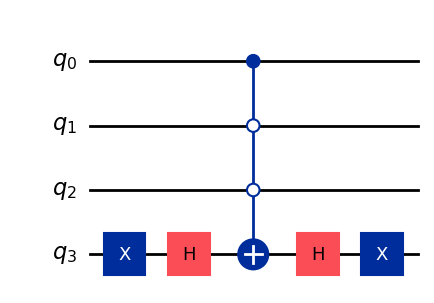

In [36]:
n=4
qc = QuantumCircuit(n)
qc.x(n-1)
qc.h(n-1)
qc.mcx([0,1,2],3,ctrl_state='001')
qc.h(n-1)
qc.x(n-1)
qc.draw('mpl')

In [37]:
def phase_oracle(name = 'Uf'):
    qc = QuantumCircuit(4, name=name)
    qc.x(n-1)
    qc.h(n-1)
    qc.mcx([0,1,2],3,ctrl_state='001')
    qc.h(n-1)
    qc.x(n-1)
    return qc

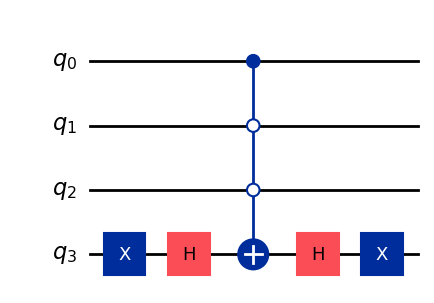

In [38]:
n=4
qc = QuantumCircuit(n)
qc.x(n-1)
qc.h(n-1)
qc.mcx([0,1,2],3,ctrl_state='001')
qc.h(n-1)
qc.x(n-1)
qc.draw('mpl')

In [39]:
def diffuser(name='V'):
    n=4
    qc = QuantumCircuit(n, name=name)
    qc.h(range(n))
    qc.x(n-1)
    qc.h(n-1)
    qc.mcx([0,1,2],3,ctrl_state='000')
    qc.h(n-1)
    qc.x(n-1)
    qc.h(range(n))
    return qc

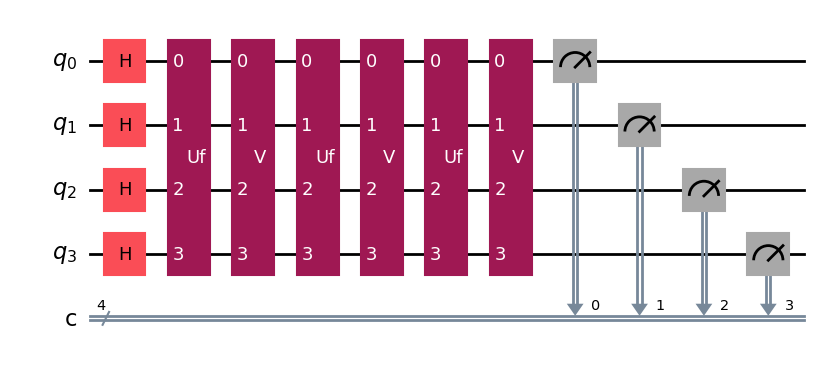

In [40]:
n=4
gr = QuantumCircuit(n, n)
nsol=1 #number of solutions
alpha=np.arcsin(np.sqrt(nsol/2**(n))) # Determine alpha
r = round(np.pi/(4*alpha)-0.5) # Determine r

gr.h(range(n))    # step 1: apply Hadamard gates on all working qubits


# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    #phase_oracle(gr,n)
    #diffuser(gr,n)
    gr.append(phase_oracle(), range(n))
    gr.append(diffuser(), range(n))

gr.measure(range(n), range(n))    # step 3: measure all qubits

gr.draw('mpl')

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1000, num_bits=4>)), metadata={'shots': 1000, 'circuit_metadata': {}})], metadata={'version': 2})


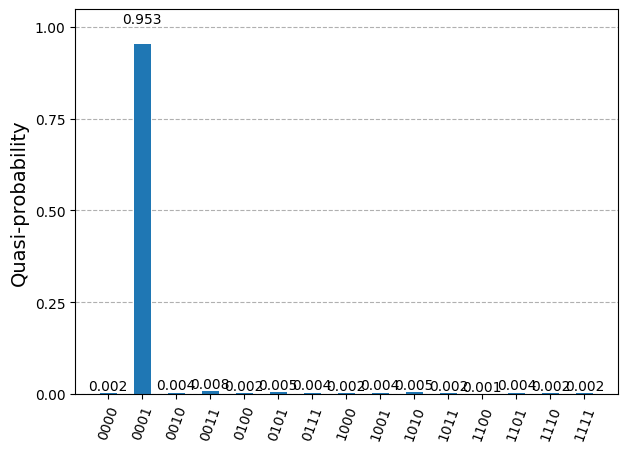

In [41]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit import transpile
simulator_aer=AerSimulator()
gr_trsp = transpile(gr, simulator_aer)
sampler_aer = Sampler(simulator_aer)
job = sampler_aer.run([(gr_trsp, None,1000)])
result =  job.result()
print(result)
counts = result[0].data.c.get_counts()
from qiskit.visualization import plot_histogram, plot_distribution

plot_distribution(counts)

In [42]:
# PUBs on IBM quantum computers
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

ibm_service = QiskitRuntimeService(channel = "ibm_quantum", token = "24e5154ab79676e9f0831672423f800ef35f3781e632f6db41474fb97bb0749bfb78959312e5245baea0d71754cc64da1d3889143285a0ffc4586ea81ba5cc06")

In [43]:
ibm_qcomp = ibm_service.backend("ibm_kyiv")
sampler_ibm = SamplerV2(mode=ibm_qcomp)

qc_tr_ibm = transpile(gr, backend = ibm_qcomp)

job_ibm = sampler_ibm.run([(qc_tr_ibm,None,1000)]) #PUB = (circuit, paramters, shots)
print(job_ibm.job_id())

cz5cn0c1xvhg008ech6g


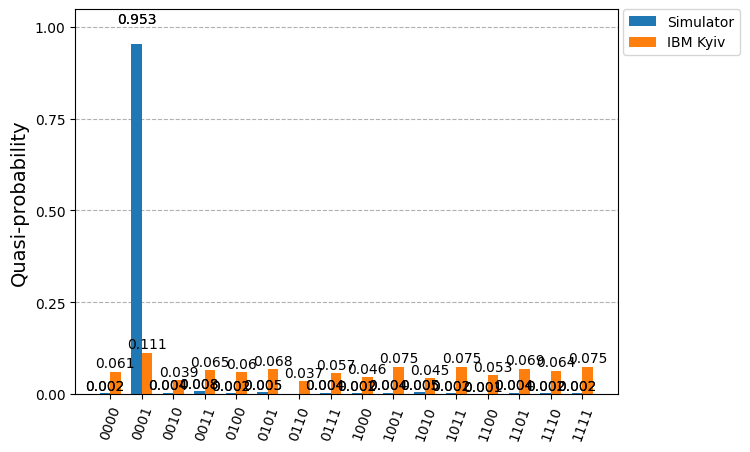

In [45]:

job = ibm_service.job('cz5cn0c1xvhg008ech6g')
result = job.result()
counts_ibm = result[0].data.c.get_counts()
from qiskit.visualization import plot_histogram, plot_distribution

plot_distribution([counts,counts_ibm], legend = ['Simulator', 'IBM Kyiv'])